In [ ]:
# Install transformer models and datasets from HuggingFace
! pip install transformers datasets

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict, ClassLabel

In [ ]:
FROM_SAVED = True

In [ ]:
# Path to FC1 Data
FNC1_DATA = "/content/drive/MyDrive/fnc-1"
FNC1_MODELS = "/content/drive/MyDrive/fnc-1/models"

In [ ]:
df_competition_test_stances_unlabeled = pd.read_csv(os.path.join(FNC1_DATA, 'competition_test_stances_unlabeled.csv'))
df_competition_test_stances = pd.read_csv(os.path.join(FNC1_DATA, 'competition_test_stances.csv'))
df_competition_test_bodies  = pd.read_csv(os.path.join(FNC1_DATA, 'competition_test_bodies.csv'))

df_train_bodies  = pd.read_csv(os.path.join(FNC1_DATA, 'train_bodies.csv'))
df_train_stances = pd.read_csv(os.path.join(FNC1_DATA, 'train_stances.csv'))

df_test_bodies = pd.read_csv(os.path.join(FNC1_DATA, 'test_bodies.csv'))
df_test_stances_unlabeled = pd.read_csv(os.path.join(FNC1_DATA, 'test_stances_unlabeled.csv'))

In [ ]:
df_competition_test_dataset = pd.merge(df_competition_test_stances_unlabeled, df_competition_test_bodies, how='left', on='Body ID')
df_train_dataset            = pd.merge(df_train_bodies, df_train_stances, how='left', on='Body ID')
df_test_dataset             = pd.merge(df_test_bodies, df_competition_test_stances, how='left', on='Body ID')

In [ ]:
label_map = {"agree": 0, "disagree": 1, "discuss" : 2, "unrelated": 3}
label_mapper = lambda x: label_map.get(x)

df_train_dataset['label'] = df_train_dataset['Stance'].apply(label_mapper)
df_test_dataset['label']  = df_test_dataset['Stance'].apply(label_mapper)

# Competition and train have no overlap?
print(set(df_competition_test_dataset['Body ID'].tolist()) & set(df_train_dataset['Body ID'].tolist()) == set())
# Competition and test have no overlap?
print(set(df_competition_test_dataset['Body ID'].tolist()) & set(df_test_dataset['Body ID'].tolist()) == set())
# Train and test have overlap?
print(set(df_train_dataset['Body ID'].tolist()) & set(df_test_dataset['Body ID'].tolist()) == set())

df_train_dataset.drop(labels=['Body ID', 'Stance'], axis=1, inplace=True)
df_test_dataset.drop(labels=['Body ID', 'Stance'], axis=1, inplace=True)
df_competition_test_dataset.drop(labels=['Body ID'], axis=1, inplace=True)

True
False
True


In [ ]:
df_train_dataset

,articleBody,Headline,label
0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",3
1,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,3
2,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,3
3,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,3
4,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,3
...,...,...,...
49967,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0
49968,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0
49969,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0
49970,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0


In [ ]:
df_test_dataset

,articleBody,Headline,label
0,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,3
1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,0
2,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,3
3,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,3
4,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,3
...,...,...,...
25408,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,1
25409,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,0
25410,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,1
25411,Remember how much Republicans wanted to repeal...,Why Obamacare failed,1


In [ ]:
df_competition_test_stances_unlabeled

,Headline,Body ID
0,Ferguson riots: Pregnant woman loses eye after...,2008
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550
2,A Russian Guy Says His Justin Bieber Ringtone ...,2
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793
4,Argentina's President Adopts Boy to End Werewo...,37
...,...,...
25408,The success of the Affordable Care Act is a hu...,2582
25409,The success of the Affordable Care Act is a hu...,2583
25410,The success of the Affordable Care Act is a hu...,2584
25411,The success of the Affordable Care Act is a hu...,2585


In [ ]:
df_competition_test_dataset

,Headline,articleBody
0,Ferguson riots: Pregnant woman loses eye after...,A RESPECTED senior French police officer inves...
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,Dave Morin's social networking company Path is...
2,A Russian Guy Says His Justin Bieber Ringtone ...,A bereaved Afghan mother took revenge on the T...
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",Hewlett-Packard is officially splitting in two...
4,Argentina's President Adopts Boy to End Werewo...,An airline passenger headed to Dallas was remo...
...,...,...
25408,The success of the Affordable Care Act is a hu...,"Congressional Republicans, evidently hoping th..."
25409,The success of the Affordable Care Act is a hu...,Did Obamacare work?\n\nIt’s worth reflecting u...
25410,The success of the Affordable Care Act is a hu...,Millions may lose coverage next year if Congre...
25411,The success of the Affordable Care Act is a hu...,"Come November, the grim trudge across the incr..."


In [ ]:
train = Dataset.from_pandas(df_train_dataset)
test  = Dataset.from_pandas(df_test_dataset)
competition_test = Dataset.from_pandas(df_competition_test_dataset)

In [ ]:
train_test_valid = train.train_test_split(0.2)

train_test_valid_dataset = DatasetDict({
    'train': train_test_valid['train'],
    'test' : test,
    'valid': train_test_valid['test'],
    'competition_test': competition_test
})

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer

checkpoint = "roberta-base"
#checkpoint = "bert-base-uncased"
#checkpoint = "distilbert-base-uncased"

print("Using checkpoint: ", checkpoint)

saved_checkpoint = os.path.join(FNC1_MODELS, checkpoint+"-fnc1")

# if FROM_SAVED:
#   tokenizer = AutoTokenizer.from_pretrained(saved_checkpoint)
# else:
#   tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

def tokenize_function(example):
    return tokenizer(example["Headline"], example["articleBody"], padding=True, truncation=True)

tokenized_datasets = train_test_valid_dataset.map(tokenize_function, batched=True)

Using checkpoint:  roberta-base


Could not locate the tokenizer configuration file, will try to use the model config instead.
https://huggingface.co/roberta-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpgevmjvv1


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
creating metadata file for /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hid

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
creating metadata file for /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
https://huggingface.co/roberta-base/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpby7byodl


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/roberta-base/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpj3wxgk5p


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730
creating metadata file for /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730
loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta

  0%|          | 0/40 [00:00<?, ?ba/s]

  0%|          | 0/26 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/26 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['articleBody', 'Headline', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 39977
    })
    test: Dataset({
        features: ['articleBody', 'Headline', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 25413
    })
    valid: Dataset({
        features: ['articleBody', 'Headline', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 9995
    })
    competition_test: Dataset({
        features: ['Headline', 'articleBody', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 25413
    })
})

In [ ]:
features_train = tokenized_datasets['train'].features.copy()
features_test  = tokenized_datasets['test'].features.copy()
features_valid = tokenized_datasets['valid'].features.copy()

features_train["label"] = ClassLabel(num_classes=4, names=list(label_map.keys()), names_file=None, id=None)
features_test["label"]  = ClassLabel(num_classes=4, names=list(label_map.keys()), names_file=None, id=None)
features_valid["label"] = ClassLabel(num_classes=4, names=list(label_map.keys()), names_file=None, id=None)

def adjust_labels(batch):
    batch["label"] = [sentiment for sentiment in batch["label"]]
    return batch

tokenized_datasets['train'] = tokenized_datasets['train'].map(adjust_labels, batched=True, features=features_train)
tokenized_datasets['test']  = tokenized_datasets['test'].map(adjust_labels, batched=True, features=features_test)
tokenized_datasets['valid'] = tokenized_datasets['valid'].map(adjust_labels, batched=True, features=features_valid)


  0%|          | 0/40 [00:00<?, ?ba/s]

  0%|          | 0/26 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

In [ ]:
tokenized_datasets['train'][0].get('label')#.features

2

In [ ]:
# max([x.get('label') for x in tokenized_datasets['train']])

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
data_collator

DataCollatorWithPadding(tokenizer=PreTrainedTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if FROM_SAVED:
    model = AutoModelForSequenceClassification.from_pretrained(saved_checkpoint, num_labels=4)
else:
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=4)

model = model.to(device)
print(device)

loading configuration file /content/drive/MyDrive/fnc-1/models/roberta-base-fnc1/config.json
Model config RobertaConfig {
  "_name_or_path": "/content/drive/MyDrive/fnc-1/models/roberta-base-fnc1",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_v

cuda:0


In [ ]:
from transformers import Trainer

small_train_sample = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_valid_sample = tokenized_datasets["valid"].shuffle(seed=42).select(range(1000))

trainer = Trainer(
    model,
    training_args,
    train_dataset=small_train_sample,
    eval_dataset=small_valid_sample,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
if "cuda" in device.type:
    torch.cuda.empty_cache()
    torch.cuda.memory_summary(device=device, abbreviated=False)

In [ ]:
print(checkpoint)
if not FROM_SAVED: results = trainer.train()

roberta-base


In [ ]:
print(checkpoint)
results.metrics

roberta-base


{'epoch': 3.0,
 'total_flos': 397416370176000.0,
 'train_loss': 0.4420974934895833,
 'train_runtime': 301.1524,
 'train_samples_per_second': 9.962,
 'train_steps_per_second': 1.245}

In [ ]:
if not FROM_SAVED: model.save_pretrained(os.path.join(FNC1_MODELS, checkpoint+"-fnc1"))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Metrics
small_test_sample = tokenized_datasets['test'].shuffle(seed=42).select(range(1000))
predictions = trainer.predict(small_test_sample)

preds = np.argmax(predictions.predictions, axis=-1)
report = classification_report(predictions.label_ids, preds, target_names=list(label_map.keys()))

print(checkpoint)
print(report)

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: Headline, __index_level_0__, articleBody. If Headline, __index_level_0__, articleBody are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 8


roberta-base
              precision    recall  f1-score   support

       agree       0.34      0.62      0.44        72
    disagree       0.00      0.00      0.00        30
     discuss       0.69      0.60      0.64       164
   unrelated       0.99      0.98      0.98       734

    accuracy                           0.86      1000
   macro avg       0.50      0.55      0.52      1000
weighted avg       0.86      0.86      0.86      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


roberta-base


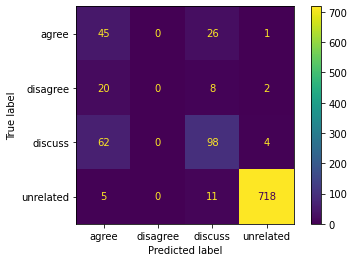

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

map_label = {v:k for k,v in label_map.items()}

ground_labels = [map_label.get(id) for id in predictions.label_ids]
pred_labels   = [map_label.get(id) for id in preds]

cm = confusion_matrix(ground_labels, pred_labels, labels=list(label_map.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_map.keys()))

print(checkpoint)
disp.plot()
plt.show()

In [ ]:
# ONLY DO THIS FOR HIGHEST SCORING MODEL

# Competition Metrics
competition_test = tokenized_datasets['competition_test']#.shuffle(seed=42).select(range(200))
predictions = trainer.predict(competition_test)

# Get highest prob classes and save
preds = np.argmax(predictions.predictions, axis=-1)
np.save(os.path.join(FNC1_DATA, 'competition_preds_'+checkpoint), preds)


The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: Headline, __index_level_0__, articleBody. If Headline, __index_level_0__, articleBody are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 25413
  Batch size = 8


KeyboardInterrupt: ignored

In [ ]:
np.save(os.path.join(FNC1_DATA, 'competition_preds_'+"bert-base-uncased"), preds)

In [ ]:
predictions

In [ ]:
preds

In [ ]:
label_map = {"agree": 0, "disagree": 1, "discuss" : 2, "unrelated": 3}
map_label = {v:k for k,v in label_map.items()}

map_labeler = lambda x: map_label.get(x)


df_results = df_competition_test_stances_unlabeled
df_results['Stance'] = preds
df_results['Stance'] = df_results['Stance'].apply(map_labeler)
df_results

In [ ]:
df_results.to_csv(os.path.join(FNC1_DATA, 'answer.csv'), index=False, encoding='utf-8') # From pandas library

In [ ]:
# If need to load...
preds = np.load(os.path.join(FNC1_DATA, 'competition_preds.npy'))

In [ ]:
preds